# Deep Learning Project - Adult versus Children Classification


## Installing TensorFlow and Keras

The deep learning packages, TensorFlow and Keras are not installed by default, but can be installed as follows:

In [1]:
COLAB = FALSE
KAGGLE = TRUE

In [2]:
#Installing TF and Keras takes approx 2 minutes
if (COLAB){
    ptm <- proc.time()
    install.packages("tensorflow")
    install.packages("keras")
    install.packages("tfprobability") #needs approx 30 seconds
    proc.time() - ptm
    #devtools::install_github("rstudio/keras") works ok but no tfp
}
if (KAGGLE){
   reticulate::use_condaenv("r-reticulate", required = TRUE) #We activate the conda enviroment
   reticulate::py_install('tensorflow_probability==0.14.1', pip=TRUE, envname="r-reticulate") #Installs the correct python version of TFP
   install.packages("tfprobability") #This installs the R-wrappers of TFP
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(keras)
library(tensorflow)
library(tfprobability)
library(tidyverse)
library(imager)#for loading images
d = tf$version
d$VERSION #2.6.5
tf$test$gpu_device_name() #If '/device:GPU:0' then the on GPU

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘imager’


The following object is masked from ‘package:magrittr’:

    add


The following object is masked from ‘package:stringr’:

    boundary


The following object is masked from ‘package:tidyr’:

    fill


The following objects are masked from ‘package:stats’:

    convolve, spectrum


The following object is masked from ‘package:graphics’:

    frame


The following obje

[1] "2.6.5"

[1] "/device:GPU:0"

## Data loading
In this notebook, we work with https://www.kaggle.com/datasets/die9origephit/children-vs-adults-images.

## Training und Validations Set Preperation 


we split the trainingset into training and validation  
and merge the adults and children into one tensor


In [4]:
image_size_x = 2*37L
image_size_y = 2*32L

PATH_adult = '../input/children-vs-adults-images/train/adults/'
PATH_children = '../input/children-vs-adults-images/train/children/'
files_0 = dir(PATH_adult, pattern = '.jpg')
files_1 = dir(PATH_children, pattern = '.jpg')
l0 = length(files_0)
l1 = length(files_1)
#l0
#l1
#split.para = 0.8
#(l0t = split.para * l0)
#(l1t = split.para * l1)
#(l0v = (1-split.para) * l0)
#(l1v = (1-split.para) * l1)
l0t = 272L
l1t = 272L
l0v = 68L
l1v = 68L
#(validlength =l0v+l1v)
X_train = array(dim=c(l0t + l1t, image_size_x,image_size_y,3L))
y_train = rep(-1,l0t + l1t)
X_valid = array(dim=c(136, image_size_x,image_size_y,3L))
y_valid = rep(-1,136)
#y_valid = rep(-1,136)
#dim(X_train)
#dim(X_valid)
#length(y_train)
#length(y_valid)
loaded = 0 # Anzahl der Files die geladen wurden
loadedv = 0 # Anzahl der Files die in valid geladen wurden

## Zufallsaufteilung in train and validation set
set.seed(1010)
sampleta = sort(sample(1:l0, l0t)) # trainings sample (adults bzw. für beide dassselbe)
#sampleta
all = seq(1:l0)
sampleva = all[-sampleta] # validierungs sample (adults bzw. für beide dasselbe)
#sampleva
#sampletc = 
#length(all)
#length(sampleta)
#length(sampleva)

## train adults einlesen
for (i in 1:l0t){
    img <- keras::image_load(paste0(PATH_adult,files_0[sampleta[i]]), target_size = c(image_size_x, image_size_y))
     x <- keras::image_to_array(img)
     X_train[i,,,] = x
     y_train[i] = 0 # 0 = adult
     loaded = loaded + 1
     #if (i %% 20 == 0) cat(i)
}
## valid adults einlesen
for (i in 1:l0v){
    img <- keras::image_load(paste0(PATH_adult,files_0[sampleva[i]]), target_size = c(image_size_x, image_size_y))
     x <- keras::image_to_array(img)
     X_valid[i,,,] = x
     y_valid[i] = 0 # 0 = adult
     loadedv = loadedv + 1
     #if (i %% 20 == 0) cat(i)
}
#loadedv

### nur trainingsset adults, dafür alle Trainingsbilder
#for (i in 1:length(files_0)){
#        img <- keras::image_load(paste0(PATH_adult,files_0[i]), target_size = c(image_size_x, image_size_y))
#        x <- keras::image_to_array(img)
#        X_train[i,,,] = x
#        y_train[i] = 0 # 0 = adult
#        loaded = loaded + 1
      #if (i %% 20 == 0) cat(i)
#}



## train children einlesen
for (i in 1:l1t){
        img <- keras::image_load(paste0(PATH_children,files_1[sampleta[i]]), target_size = c(image_size_x, image_size_y))
        x <- keras::image_to_array(img)
        X_train[l0t + i,,,] = x
        y_train[l0t + i] = 1 # 1 = child
        loaded = loaded + 1
      #if (i %% 20 == 0) cat(i)
}

## valid children einlesen -- spuckt eine Fehlermeldung aus, out of bound
for (i in 1:l1v){
        img <- keras::image_load(paste0(PATH_children,files_1[sampleva[i]]), target_size = c(image_size_x, image_size_y))
        x <- keras::image_to_array(img)
        X_valid[l0v + i,,,] = x
        y_valid[l0v + i] = 1 # 1 = child
        loaded = loaded + 1
      #if (i %% 20 == 0) cat(i)
}

## train children einlesen (ohne split train & valid-set)
#for (i in 1:length(files_1)){
#        img <- keras::image_load(paste0(PATH_children,files_1[i]), target_size = c(image_size_x, image_size_y))
#        x <- keras::image_to_array(img)
#        X_train[length(files_0) + i,,,] = x
#        y_train[length(files_0) + i] = 1 # 1 = child
#        loaded = loaded + 1
      #if (i %% 20 == 0) cat(i)
#}

## Test Set Preperation 
we merge the adults and children into one tensor

In [5]:
PATH_adult = '../input/children-vs-adults-images/test/adults/'
PATH_children = '../input/children-vs-adults-images/test/children/'
files_0 = dir(PATH_adult, pattern = '.jpg')
files_1 = dir(PATH_children, pattern = '.jpg')
l0 = length(files_0)
l1 = length(files_1)
#l0
#l1
X_test = array(dim=c(length(files_0) + length(files_1), image_size_x,image_size_y,3L))
y_test = rep(-1,length(files_0) + length(files_1))
loaded = 0 # Anzahl der Files die geladen wurden
## test adults einlesen
for (i in 1:length(files_0)){
        img <- keras::image_load(paste0(PATH_adult,files_0[i]), target_size = c(image_size_x, image_size_y))
        x <- keras::image_to_array(img)
        X_test[i,,,] = x
        y_test[i] = 0 # 0 = adult
        loaded = loaded + 1
      #if (i %% 20 == 0) cat(i)
}
## test children einlesen
for (i in 1:length(files_1)){
        img <- keras::image_load(paste0(PATH_children,files_1[i]), target_size = c(image_size_x, image_size_y))
        x <- keras::image_to_array(img)
        X_test[length(files_0) + i,,,] = x
        y_test[length(files_0) + i] = 1 # 1 = child
        loaded = loaded + 1
      #if (i %% 20 == 0) cat(i)
}

## Look inside the data


Attaching package: ‘grid’


The following object is masked from ‘package:imager’:

    depth




[1] 1

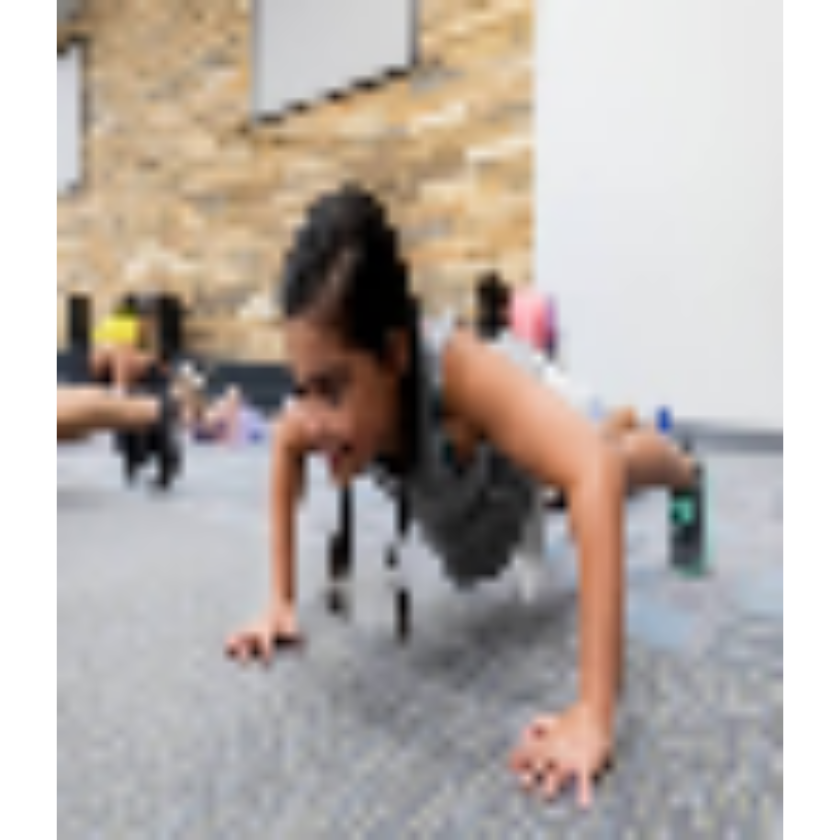

In [6]:
## Training set
library(grid)
idx = 273
grid.raster(X_train[idx,,,]/255) #Check an image from training-set
y_train[idx]


[1] 1

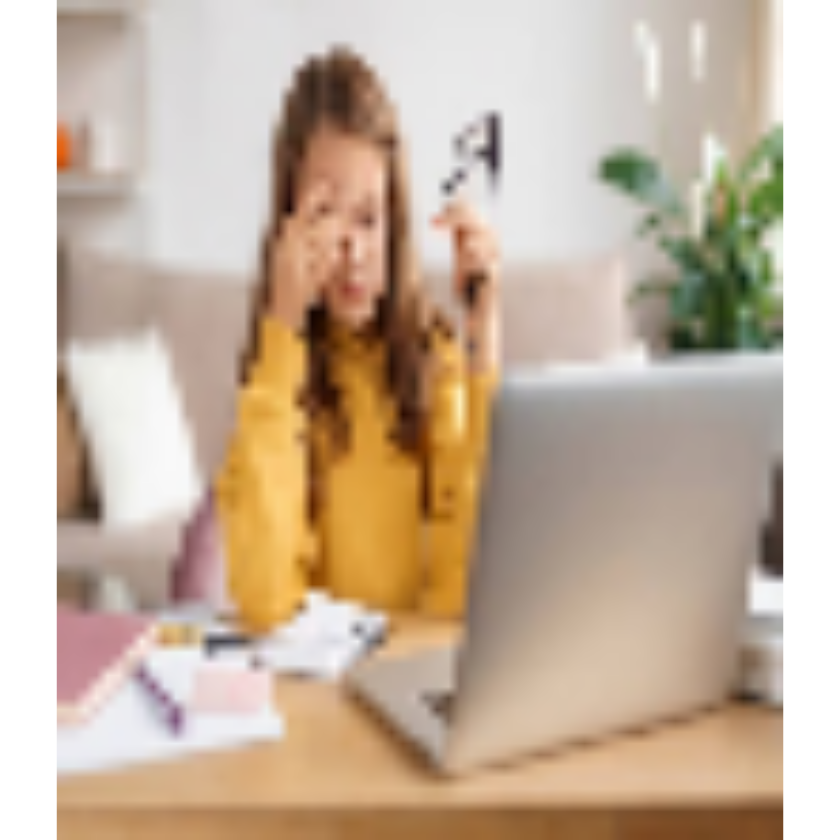

In [7]:
## Validation set 
idxv = 69
grid.raster(X_valid[idxv,,,]/255) #Check an image from validation set
y_valid[idxv]

check image from test set

[1] 0

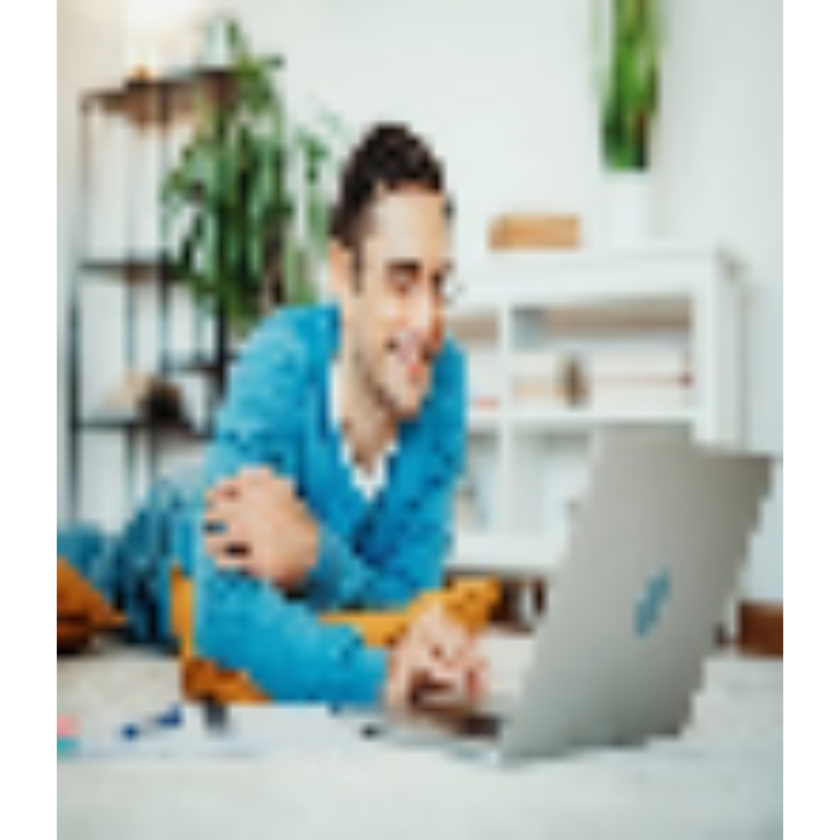

In [8]:
## Test set
idx2 = 4
grid.raster(X_test[idx2,,,]/255) #Check a test image
y_test[idx2]

## Define a Model

Now we define a CNN which takes the images and learns how to extract useful image-feature that help for the prediction task. After the flattening these features are used in the fully connected part to predict.

padding = "same" bedeutet, dass der Filter auch über die Randpixel des Bildes scant; default: "valid"    
strides = 1 entspricht Filter-Schrittweite c(1,2) nach rechts um 1 Pixel und nach unten um 2 Pixel
siehe link: https://www.kaggle.com/code/ryanholbrook/the-sliding-window



In [31]:
# Image model
dropout_rate = 0.3 # Variation hat nichts sichtbares bewirkt
model <-  keras_model_sequential() %>%
  
  ### First Block
  layer_conv_2d(filters = 128, kernel_size = c(3, 3), activation = "relu",
    # input_shape = NULL, padding = "same") %>% # NULL ersetzen, siehe nächste Zeile
      input_shape = c(image_size_x,image_size_y,3), padding = "same") %>%
  layer_dropout(dropout_rate) %>% 
  layer_conv_2d(filters = 128, kernel_size = c(3, 3), activation = "relu",
                padding = "same") %>%
  layer_dropout(dropout_rate) %>% 
  layer_max_pooling_2d(pool_size = c(2, 2), padding = "same") %>%
  
  ### Second Block
  layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu",
                padding = "same") %>%
  layer_dropout(dropout_rate) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu",
                padding = "same") %>%
  layer_dropout(dropout_rate) %>% 
  layer_max_pooling_2d(pool_size = c(2, 2), padding = "same") %>%
  
  ### Third Block
  layer_conv_2d(filters = 32, kernel_size = c(3, 3), activation = "relu",
                padding = "same") %>%
  #layer_dropout(dropout_rate) %>%
  layer_conv_2d(filters = 32, kernel_size = c(3, 3), activation = "relu",
                padding = "same") %>%
  #layer_dropout(dropout_rate) %>%
  layer_max_pooling_2d(pool_size = c(2, 2), padding = "same") %>%

  ### Forth Block
  layer_conv_2d(filters = 16, kernel_size = c(3, 3), activation = "relu",
                padding = "same") %>%
  #layer_dropout(dropout_rate) %>%
  layer_conv_2d(filters = 16, kernel_size = c(3, 3), activation = "relu",
                padding = "same") %>%
  #layer_dropout(dropout_rate) %>%
  layer_max_pooling_2d(pool_size = c(2, 2), padding = "same") %>%
  
  ### fcNN
  layer_flatten() %>%
  layer_dense(units = 64, activation = "relu") %>%
  layer_dropout(dropout_rate) %>% 
  layer_dense(units = 256, activation = "relu") %>%
  layer_dropout(dropout_rate) %>% 
  #layer_dense(units = 2) %>% # bei uns nicht, sondern  activiation = 'softmax'
  #layer_distribution_lambda(make_distribution_fn = CPD)
  #layer_dense(units = 2,activation = 'softmax') # statt die oberen zwei Zeilen, ACHTUNG: dim(y)= 2, oder units = 1, activation = 'sigmoid'
  layer_dense(units = 1,activation = 'sigmoid')

In [32]:
# compile model and initialize weights
model %>%
  compile(
    #optimizer = 'adam',
    optimizer = optimizer_adam(learning_rate = 0.0002),
    #loss = 'categorical_crossentropy', # bei 2 und mehr Klassen
    loss = 'binary_crossentropy', # bei einer Klasse
    metrics = c('accuracy')
  )

In [23]:
summary(model)


Model: "sequential_3"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_31 (Conv2D)                  (None, 74, 64, 128)             3584        
________________________________________________________________________________
dropout_23 (Dropout)                (None, 74, 64, 128)             0           
________________________________________________________________________________
conv2d_30 (Conv2D)                  (None, 74, 64, 128)             147584      
________________________________________________________________________________
dropout_22 (Dropout)                (None, 74, 64, 128)             0           
________________________________________________________________________________
max_pooling2d_15 (MaxPooling2D)     (None, 37, 32, 128)             0           
________________________________________________________________________________
conv2d

## Train and evaluate the model

`geom_smooth()` using formula 'y ~ x'



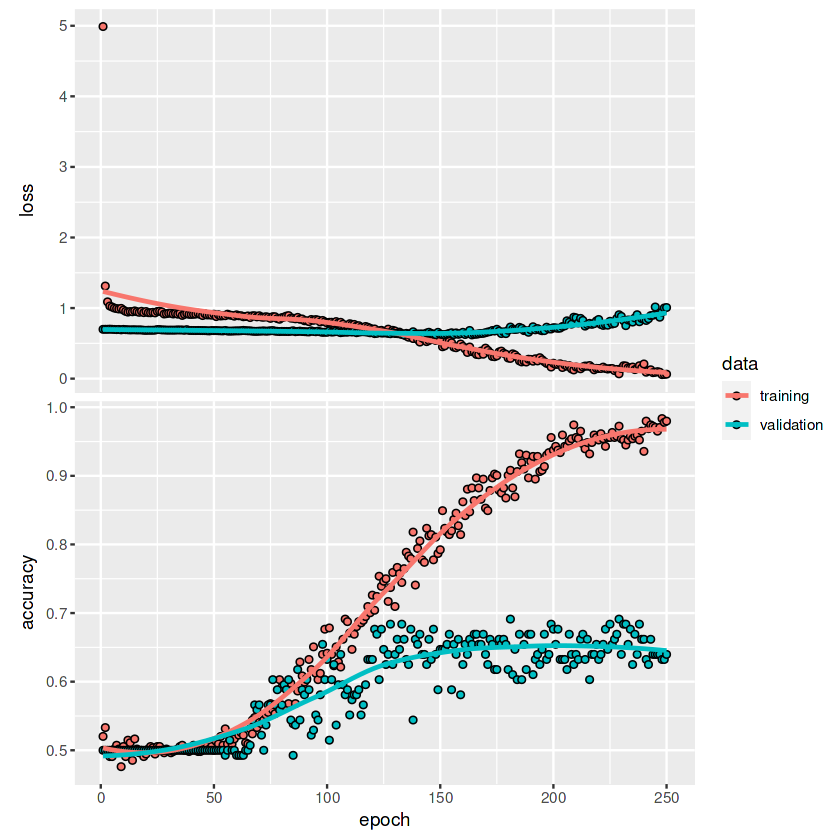

In [33]:
# train the model
history <- model %>% 
  fit(x = X_train,
      y = y_train,
      validation_data=list(X_valid,y_valid), # bei separatem validation set
      #validation_split=0.2, #use 10% of training set as validation set
      batch_size = 64, # original: 64
      verbose = 0,
      epochs = 250, # original: 50
      shuffle = TRUE,
      class_weight = list("0"=1,"1"=2) # usefull if  dataset is unbalanced
     )
# loss and accuracy curve
plot(history)

In [34]:
# test set: loss, accuracy and confusion matrix
pred = predict(model, X_test)
evaluate(model,X_test, y_test)  # determines loss (average NLL) on test set
y_pred = round(pred)
table(y_test)
table(y_pred)
table(y_test , y_pred)

loss  accuracy 
1.3828102 0.6833333

y_test
 0  1 
60 60 

y_pred
 0  1 
64 56 

      y_pred
y_test  0  1
     0 43 17
     1 21 39

In [35]:
# training set: loss, accuracy and confusion matrix
pred_train = predict(model, X_train)
evaluate(model,X_train, y_train)  # determines loss (average NLL) on test set
pred_train = round(pred_train)
table(y_train)
table(pred_train)
table(y_train, pred_train)

loss   accuracy 
0.05703093 0.99080884

y_train
  0   1 
272 272 

pred_train
  0   1 
269 275 

       pred_train
y_train   0   1
      0 268   4
      1   1 271

In [36]:
# validation set: loss, accuracy and confusion matrix
pred_valid = predict(model, X_valid)
evaluate(model,X_valid, y_valid)  # determines loss (average NLL) on test set
pred_valid = round(pred_valid)
table(y_valid)
table(pred_valid)
table(y_valid, pred_valid)

loss  accuracy 
1.0075724 0.6397059

y_valid
 0  1 
68 68 

pred_valid
 0  1 
73 63 

       pred_valid
y_valid  0  1
      0 46 22
      1 27 41

## Analysing The Wrong Classified Images

In [38]:
# die ID der falsch klassifizierten Bilder (der Reihe nach, wie sie eingelesen wurden)
(idx_wrong = which(as.vector(y_pred) != y_test))
orig_names = c(0, 1, seq(10, 19, 1), 2, seq(20, 29,1), 3, seq(30, 39, 1), 4, seq(40, 49, 1), 5, seq(50, 59, 1), seq(6,9))
orig_names = c(orig_names, orig_names)
# die Dateinamen der falsch klassifizierten Bilder
orig_names[idx_wrong]
#length(idx_wrong)

[1]   1   3  19  21  27  28  33  38  39  41  44  45  47  50  55  56  60  62  66
[20]  69  78  80  81  82  83  84  86  88  89  94  97 101 105 107 113 114 116 118

[1]  0 10 25 27 32 33 38 42 43 45 48 49 50 53 58 59  9  1 13 16 24 26 27 28 29
[26]  3 31 33 34 39 41 45 49 50 56 57 59  7